# House Prices: Advanced Regression Techniques

**Link:** https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

**Kaggle Description**
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


# Import and Structure Files

In [341]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [342]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,NaN,2,1Fam,TA,No,468.0,144.0,...,WD,120,Pave,5,882.0,AllPub,140,1961,1961,2010
1,1329,0,0,NaN,3,1Fam,TA,No,923.0,0.0,...,WD,0,Pave,6,1329.0,AllPub,393,1958,1958,2010
2,928,701,0,NaN,3,1Fam,TA,No,791.0,0.0,...,WD,0,Pave,6,928.0,AllPub,212,1997,1998,2010
3,926,678,0,NaN,3,1Fam,TA,No,602.0,0.0,...,WD,0,Pave,7,926.0,AllPub,360,1998,1998,2010
4,1280,0,0,NaN,2,TwnhsE,TA,No,263.0,0.0,...,WD,144,Pave,5,1280.0,AllPub,0,1992,1992,2010


In [343]:
#Read Training File
df_train=pd.read_csv("train.csv")
df_train["source"]="Train"

#Read Test File
df_test=pd.read_csv("test.csv")
df_test["source"]="Test"

#Concat Dataset and split to X and Y
df=pd.concat([df_test,df_train], axis=0)
X=df.drop("SalePrice",axis=1)
y=df["SalePrice"]

#Save source information as series and drop from DF
source=df["source"]
df.drop("source", axis=1, inplace=True)

# Data Exploration

The dataset has 1460 instances and 82 features. The target feaure we want to predict is "SalePrice".

In [344]:
df_train.shape

(1460, 82)

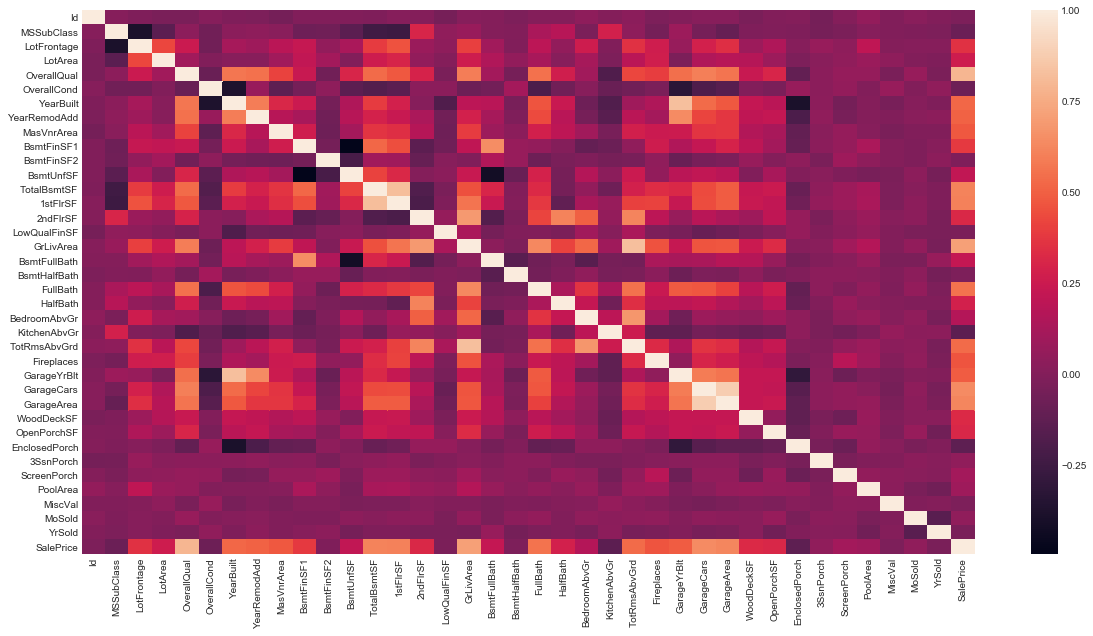

In [345]:
# Plot correlations
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr())

# Feature Engineering: Cleaning

In [346]:
# Defining categorical and numerical variables
num_cols = X.columns.values[(X.dtypes=="int64")|(X.dtypes=="float64")]
cat_cols = X.columns.values[X.dtypes=="object"]

## Explore Numerical Variables

### False numerical to categorical features

In [347]:
num_cols

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'], dtype=object)

Potential misclassifications

- MSSubClass: Identifies the type of dwelling involved in the sale.	
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- OverallCond: Rates the overall condition of the house
- OverallQual: Rates the overall material and finish of the house
- YearBuilt
- YearRemodAdd

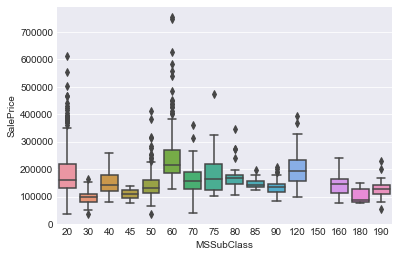

In [348]:
# Visually Identify "false numerical values"
for each in false_nums:
    plt.figure()
    sns.boxplot(X[each],y=y)

In [349]:
false_nums = ["MSSubClass"]

for each in false_nums:
    X[each]=X[each].astype('object')

Just converting "MSSubClass", due to test results.

In [350]:
# Defining categorical and numerical variables
num_cols=X.columns.values[(X.dtypes=="int64")|(X.dtypes=="float64")]
cat_cols=X.columns.values[X.dtypes=="object"]

### Outlier/Data Errors

In [351]:
# Finding Outlier using IQR*1,4

for each in num_cols:
    IQR = X[each].quantile(0.75)-X[each].quantile(0.25)
    lower_bound = X[each].quantile(0.25)-IQR*1.5
    upper_bound = X[each].quantile(0.75)+IQR*1.5
    outlier= (X[each]<lower_bound)|(X[each]>upper_bound)
    print(str(each)+": "+str(outlier.sum()))

1stFlrSF: 42
2ndFlrSF: 8
3SsnPorch: 37
BedroomAbvGr: 78
BsmtFinSF1: 15
BsmtFinSF2: 347
BsmtFullBath: 2
BsmtHalfBath: 175
BsmtUnfSF: 53
EnclosedPorch: 459
Fireplaces: 12
FullBath: 4
GarageArea: 42
GarageCars: 17
GarageYrBlt: 3
GrLivArea: 74
HalfBath: 0
Id: 0
KitchenAbvGr: 134
LotArea: 128
LotFrontage: 198
LowQualFinSF: 40
MasVnrArea: 200
MiscVal: 103
MoSold: 0
OpenPorchSF: 159
OverallCond: 252
OverallQual: 4
PoolArea: 13
ScreenPorch: 256
TotRmsAbvGrd: 51
TotalBsmtSF: 122
WoodDeckSF: 67
YearBuilt: 9
YearRemodAdd: 0
YrSold: 0


**Further Investigation**: ScreenPorch, EnclosedPorch, BsmtFinSF2 => Building additional features

#### ScreenPorch

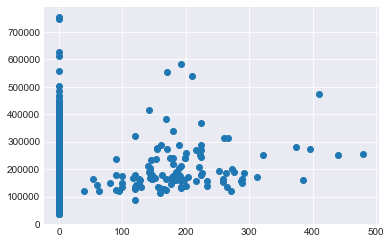

In [352]:
# Scatter Relationship with dependent variable
plt.scatter(X["ScreenPorch"],y)

In [353]:
#Create dummy variable "yes" or "no"
def porch(x):
    if x>0:
        return "porch"
    else:
        return "no porch"
        
X["ScreenPorch_cat"] = X["ScreenPorch"].apply(lambda x: porch(x))

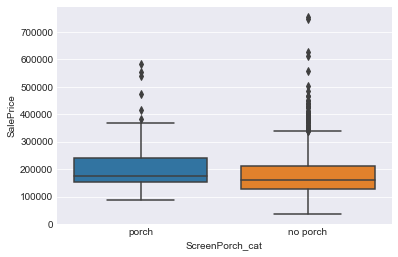

In [354]:
sns.boxplot(X["ScreenPorch_cat"],y)

#### EnclosedPorch

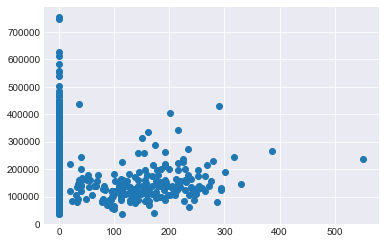

In [355]:
# Scatter Relationship with dependent variable
plt.scatter(X["EnclosedPorch"],y)

In [356]:
#Create dummy variable "yes" or "no"
def porch(x):
    if x>0:
        return "porch"
    else:
        return "no porch"
        
X["EnclosedPorch_cat"] = X["EnclosedPorch"].apply(lambda x: porch(x))

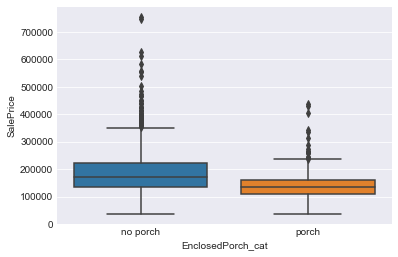

In [357]:
sns.boxplot(X["EnclosedPorch_cat"],y)

#### BsmtFinSF2

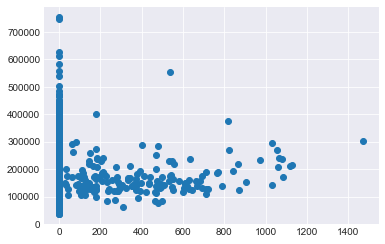

In [358]:
### Relationship Checking (numerical variables)
plt.scatter(X["BsmtFinSF2"],y)

In [359]:
#Create dummy variable "yes" or "no"
def bsmt(x):
    if x>0:
        return "Bsmt"
    else:
        return "no Bsmt"
        
X["BsmtFinSF2_cat"] = X["BsmtFinSF2"].apply(lambda x: bsmt(x))

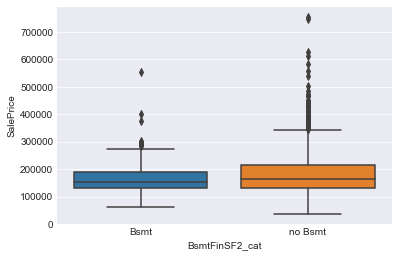

In [360]:
sns.boxplot(X["BsmtFinSF2_cat"],y)

### Check Highest Correlated Variables

In [361]:
X["total_size"]=X["LotArea"]+X["GrLivArea"]
#Dumme Idee
X["AreaPerCar"]=X["GarageArea"]/X["GarageCars"]
#Dumme Idee
X["weighted_build"]=X["YearBuilt"]*0.7+X["YearRemodAdd"]*0.3
# Gute Idee
X["bathroom_per_area"]=X["GrLivArea"]/X["FullBath"]
#dumme idee
X["Car_area"]=X["GarageArea"]+X["LotFrontage"]
#gute Idee

In [362]:
# Defining categorical and numerical variables
num_cols=X.columns.values[(X.dtypes=="int64")|(X.dtypes=="float64")]
cat_cols=X.columns.values[X.dtypes=="object"]

In [363]:
Xnum_y = X[num_cols]
Xnum_y["SalePrice"]=y

In [364]:
#Show top10 absolute correlations with "Sale Price"
top5_nums = abs(Xnum_y.corr()["SalePrice"].sort_values(ascending=False)).head(6)
top5_numscols=top5_nums.index.values
print(top5_nums)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
Car_area       0.642760
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


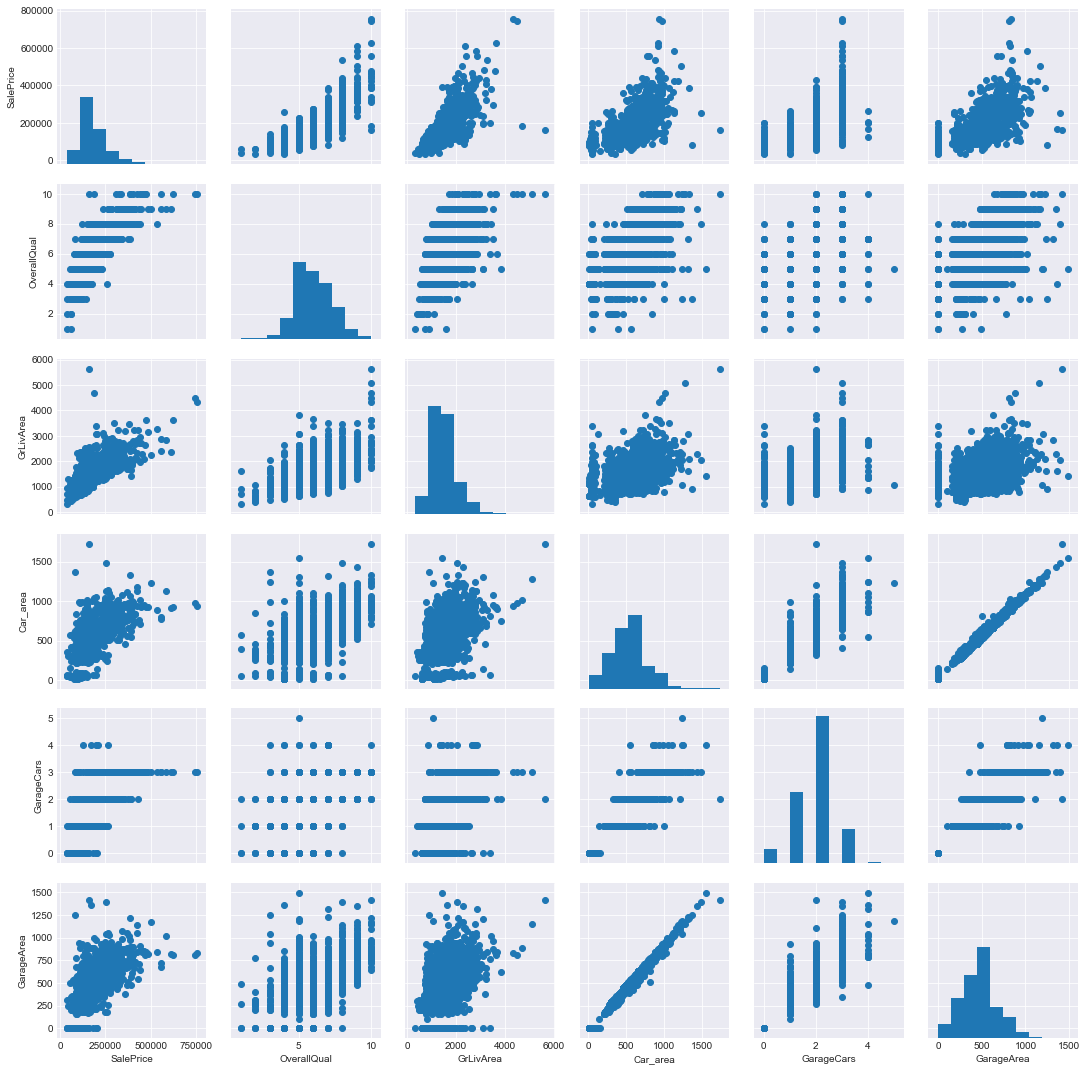

In [365]:
#Pairgrid for Top10
g = sns.PairGrid(Xnum_y[top5_numscols])
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

## Missing Values

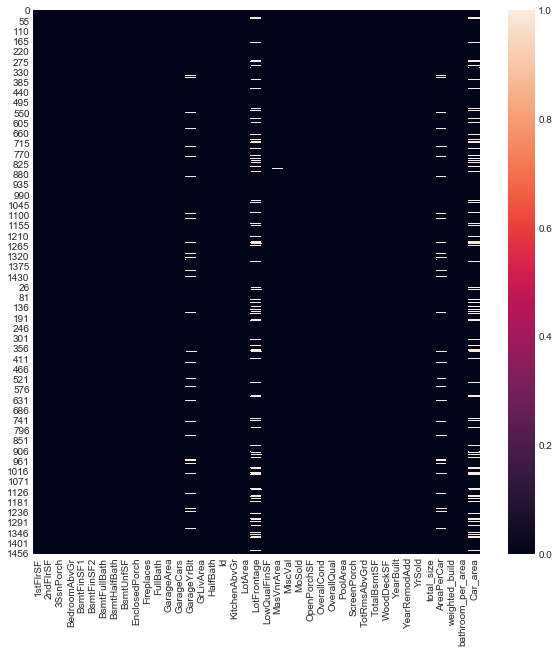

In [366]:
plt.figure(figsize=(10,10))
sns.heatmap(X[num_cols].isnull())

- Deep dive into "GarageYrBlt" and "Lot Frontage"
 - "GarageYrBlt" => insert "YearBuild"
 - "Lot Frontage" => median
- Replace all others with Median Value

In [367]:
# Replace "GarageYrBlt"
X["GarageYrBlt"].describe()

count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [368]:
X.corr()["GarageYrBlt"].sort_values(ascending=False).head()

GarageYrBlt       1.000000
weighted_build    0.849784
YearBuilt         0.834812
YearRemodAdd      0.652365
GarageCars        0.587712
Name: GarageYrBlt, dtype: float64

In [369]:
X["GarageYrBlt"]=X["GarageYrBlt"].fillna(X["YearBuilt"])

In [370]:
#Fill other columns
for each in X[num_cols]:
    X[each]=X[each].fillna(np.mean(X[each]))
X=X.fillna(0)

## Normalization

In [371]:
# Defining categorical and numerical variables
num_cols=X.columns.values[(X.dtypes=="int64")|(X.dtypes=="float64")]
cat_cols=X.columns.values[X.dtypes=="object"]

# Standardize 
for each in X[num_cols]:
    X[each] = (X[each]-X[each].min())/(X[each].max()-X[each].min())
    
#(df-df.mean())/df.std()

## One-Hot-Encoding

In [372]:
for each in cat_cols:
    X[each]=pd.Categorical(X[each])
    dummies=pd.get_dummies(X[each], prefix=str(each))
    X=pd.concat([X,dummies],axis=1)
    X.drop(each,axis=1,inplace=True)

## Split Training and Test

In [373]:
#Split Set (using source)
def sync_datasets(X,y):
    X_train = X[source=="Train"]
    y_train = y[source=="Train"]
    X_test= X[source=="Test"]
    return X_train, y_train, X_test

X_train, y_train, X_test = sync_datasets(X,y)

# Feature Selection

In [374]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor()

## Recursive Feature Selection (Deactivated)
This step should help us to get on idea on the right number of parameters

In [375]:
#Select important columns
#selected_cols=X_train.columns.values[rfecv.support_]
#selected_cols=X_train.columns.values[rfecv.support_]
#X_train=X_train[selected_cols]
#X_test=X_test[selected_cols]

# Feature Engineering

## Dependent Variable

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

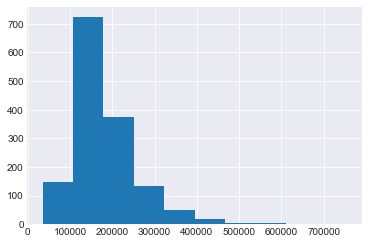

In [376]:
plt.hist(y_train)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

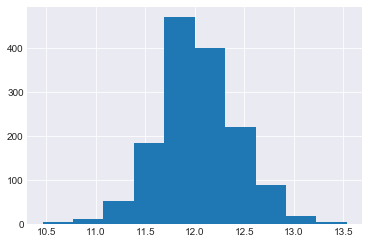

In [377]:
plt.hist(np.log(y_train))

In [378]:
y_train=np.log(y_train)

# Train Models

## Model Initialization

In [379]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Utilities_AllPub,Utilities_NoSeWa,source_Test,source_Train,ScreenPorch_cat_no porch,ScreenPorch_cat_porch,EnclosedPorch_cat_no porch,EnclosedPorch_cat_porch,BsmtFinSF2_cat_Bsmt,BsmtFinSF2_cat_no Bsmt
0,0.109641,0.413559,0.0,0.375,0.125089,0.0,0.333333,0.0,0.064212,0.000000,...,1,0,0,1,1,0,1,0,0,1
1,0.194917,0.000000,0.0,0.375,0.173281,0.0,0.000000,0.5,0.121575,0.000000,...,1,0,0,1,1,0,1,0,0,1
2,0.123083,0.419370,0.0,0.375,0.086109,0.0,0.333333,0.0,0.185788,0.000000,...,1,0,0,1,1,0,1,0,0,1
3,0.131695,0.366102,0.0,0.375,0.038271,0.0,0.333333,0.0,0.231164,0.268775,...,1,0,0,1,1,0,0,1,0,1
4,0.170342,0.509927,0.0,0.500,0.116052,0.0,0.333333,0.0,0.209760,0.000000,...,1,0,0,1,1,0,1,0,0,1


In [385]:
X_train=X_train.fillna(0)

In [386]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RandomForest=RandomForestRegressor()
RandomForest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [387]:
from sklearn.linear_model import LinearRegression
Regression=LinearRegression()
Regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [388]:
from sklearn.svm import SVR
SVR=SVR()
SVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [389]:
import xgboost as xgb
boost=xgb.XGBRegressor()
boost.fit(X_train,y_train)

[15:56:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [390]:
from sklearn.linear_model import Lasso
lasso = Lasso(fit_intercept=False)
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [391]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [392]:
from sklearn.ensemble import ExtraTreesRegressor
extra = ExtraTreesRegressor()
extra.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [393]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [394]:
#model = [lasso,boost, Regression, RandomForest, SVR, Ada,Boosting]
model = [boost,extra, elastic, Regression, RandomForest, SVR, mlp]

## Cross-Validation for Model Selection

In [395]:
from sklearn.model_selection import cross_val_score

In [396]:
for each in model:
    scores = cross_val_score(estimator=each,X=X_train, y=y_train, cv=3,scoring='explained_variance') 
    print(str(each)+" "+str(scores.mean()))

[15:56:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1) 0.8885923378510611
ExtraTreesRegressor(bootstrap=False, criter

# Hyperparameter - Tuning

## Grid Search

In [397]:
from sklearn.model_selection import GridSearchCV

In [398]:
#params = {"min_samples_leaf":[1,2,3,5,10,15], "min_samples_split": [2,3,5,10,15]}
#params = {"min_child_weight":[1,2,3,5,10], "learning_rate":[0.05,0.1,0.2,0.5], }
#params = {"alpha":[0.1, 0.3, 0.5, 0.9], "learning_rate": [0.05,0.1,0.2],"min_samples_leaf":[1,2,3,5,10]}
#params= {"learning_rate_init":[0.05, 0.2, 0.1],"alpha":[0.05, 0.2, 0.1], "hidden_layer_sizes":[(50,30,10),(20,20,10),(50,10)]}
params_mlp= {"learning_rate_init":[0.05, 0.2, 0.1],"alpha":[0.05, 0.2, 0.1], "hidden_layer_sizes":[(50,30,10),(20,20,10),(50,10)]}
param_elastic = {"fit_intercept": [True, False], "alpha": [0.01,0.05,0.1,0.5]}

In [399]:
tuning = GridSearchCV(elastic,cv=5, param_grid=param_elastic)
tuning.fit(X_train, y_train)
tuning.best_params_

{'alpha': 0.01, 'fit_intercept': True}

## Building Tuned Models

In [400]:
elastic_tuned = ElasticNet(alpha= 0.01, fit_intercept=True)
elastic_tuned.fit(X_train, y_train)
scores = cross_val_score(estimator=elastic_tuned,X=X_train, y=y_train, cv=6,scoring='explained_variance') 
print(scores.mean())

0.8131685300521494


In [401]:
mlp_tuned = MLPRegressor(alpha= 0.05, hidden_layer_sizes= (50, 10), learning_rate_init= 0.05)
mlp_tuned.fit(X_train, y_train)
scores = cross_val_score(estimator=mlp_tuned,X=X_train, y=y_train, cv=6,scoring='neg_mean_squared_error') 
print(scores.mean())

-0.04105675319142564


In [ ]:
xgb_tuned = xgb.XGBRegressor(colsample_bytree=1,
                 gamma=0.5,                 
                 learning_rate=0.005,
                 max_depth=9,
                 min_child_weight=1.5,
                 n_estimators=2000,                                                                    
                 reg_alpha=0.4,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_tuned.fit(X_train, y_train)
scores = cross_val_score(estimator=xgb_tuned,X=X_train, y=y_train, cv=10,scoring='explained_variance') 
print(scores.mean())

[15:56:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
boosted_tuned = GradientBoostingRegressor()
boosted_tuned.fit(X_train, y_train)
scores = cross_val_score(estimator=boosted_tuned,X=X_train, y=y_train, cv=10,scoring='explained_variance') 
print(scores.mean())

# Prediction

In [ ]:
#Build Esemble

In [ ]:
#Custom ensemble
model = [boosted_tuned, xgb_tuned, mlp_tuned, elastic_tuned]
weights = [0.1, 0.5, 0.1, 0.3]

array = {}
i=1

for each in model:
    array[i] = each.predict(X_test)
    i=i+1

ensemble_reg = np.zeros(1459)

for each in range(0, len(weights)):
    new=array[each+1]*weights[each]
    ensemble_reg=ensemble_reg+new
    
ensemble_reg

In [ ]:
prediction = ensemble_reg

In [ ]:
# Reverting log
prediction = np.exp(ensemble_reg)

In [ ]:
sns.distplot(ensemble_reg, color="red")
sns.distplot(y_train, color="blue")

In [ ]:
# Writing Prediction to *.csv
submission = pd.read_csv("sample_submission.csv")
submission["SalePrice"]=prediction
submission.to_csv("submission.csv", index=False)

# Learnings

- Vor one-hot-enconding training und test dataset zusammen 
- What is a stratified fold?
- Variance explained for Regression?
- Wie X[each] iteration

# Results

1. Submit: Just one hot-encoding and Random Forest (Default): 0.15554
2. Submit: One hot-encoding and Random Forest (Default), RFECV: 0.15051 (2.857)
3. Submit: Like 2, +Log Target Variable, +Fill missing values with mean instead of 0: 
4. Submit: Like 3, - Fill missing values with mean instead of 0: 0.15727
5. Submit: Normalized, median as input, pre-selected features: 0.16282
6. Submit: Model - Regression: 0.16721
7. Submit: Model - Boosting:0.19108 => overfitting
8. Submit: Random Forest, + Missing Values (Garage) + Standardization (just for nums) + Garage NaN more sophisticated:  0.15394
9. Submit: Wie 8, bloß mit Hyperparameter Tuning: 0.16575
10. Submit: gxboost: 0.13471
11. Submit: Random Forest, +Num to cols, +Log Target: 0.15785
12. Submit: like 11, with SVR: 0.14918
13. Submit: like 12, with gxb: 0.14512
14. Submit: like 13, with gxb (50 features): 0.15381
15. Submit: like 14, custom ensemble: 0.14741
16. Submit: like 15, drop log: 0.14743
17. Submit: like 16, with prediction + 5000: 0.15298
18. Submit: gxboost_tuned incl. specific RFECV: 0.14984
19. Submit: GradientBoostingRegressor: 0.15016
20. Submit: XGB with only top 10 features: 0.18058
21. Submit: XGB with new categorized features: 0.14808
22. Submit: Stacked Model: 0.14608
23. Submit: XGB (hyperparameter tuned): 0.15218
24. Summit: like 23, but manually adjusted: 0.15896
25. Submit: Fixing a typo: 0.15736
26. Submit: 50.000 Instances: 0.14279
27. Sumbit: MLP
28. Submit: MLP
29. Submit: Individual Ensemble: 0.14047
30. Submit: Individual Ensemble, drop num-to-cols: 0.13537
31. Submit: Smaller Ensemble: 0.13859
32. Sumbit: ElasticNet, Ensemble Tuned Elastic: 0.14304
33. Sumbit: Ensemble Tuned Elastic: 0.13747
34. Submit: Changed weight in ensamble: 0.14521

In [ ]:
prediction

# Ideas
- Engineering
 - Remove colinearity
- More Algos

- Stacked prediction model (also Linear Models)
- Robust against outlier

=> xgboost less overfitting

# Test on Training Data

In [131]:
#Custom ensemble
model = [boosted_tuned, xgb_tuned, mlp_tuned, elastic_tuned]
weights = [0.1, 0.5, 0.1, 0.3]

array = {}
i=1

for each in model:
    array[i] = each.predict(X_train)
    i=i+1

ensemble_train = np.zeros(1460)

for each in range(0, len(weights)):
    new=array[each+1]*weights[each]
    ensemble_train=ensemble_train+new
    
ensemble_train

array([206970.47499111, 186823.34124301, 218931.44074013, ...,
       266326.50945513, 145163.89214063, 146385.73390575])

In [132]:
df_verification = df_train

In [133]:
df_verification["pred"]=ensemble_train

In [134]:
df_verification["abs_d"]=df_verification["SalePrice"]-df_verification["pred"]

In [142]:
#Overpredicting
df_verification.sort_values(by="abs_d").head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,pred,abs_d
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,0,1,2008,New,Partial,160000,Train,266529.987571,-106529.987571
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,0,10,2007,New,Partial,184750,Train,285634.632589,-100884.632589
1324,1325,20,RL,75.0,9986,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2007,New,Partial,147000,Train,216845.427067,-69845.427067
632,633,20,RL,85.0,11900,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2009,WD,Family,82500,Train,133110.486401,-50610.486401
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,8,2009,New,Partial,253293,Train,301241.873866,-47948.873866


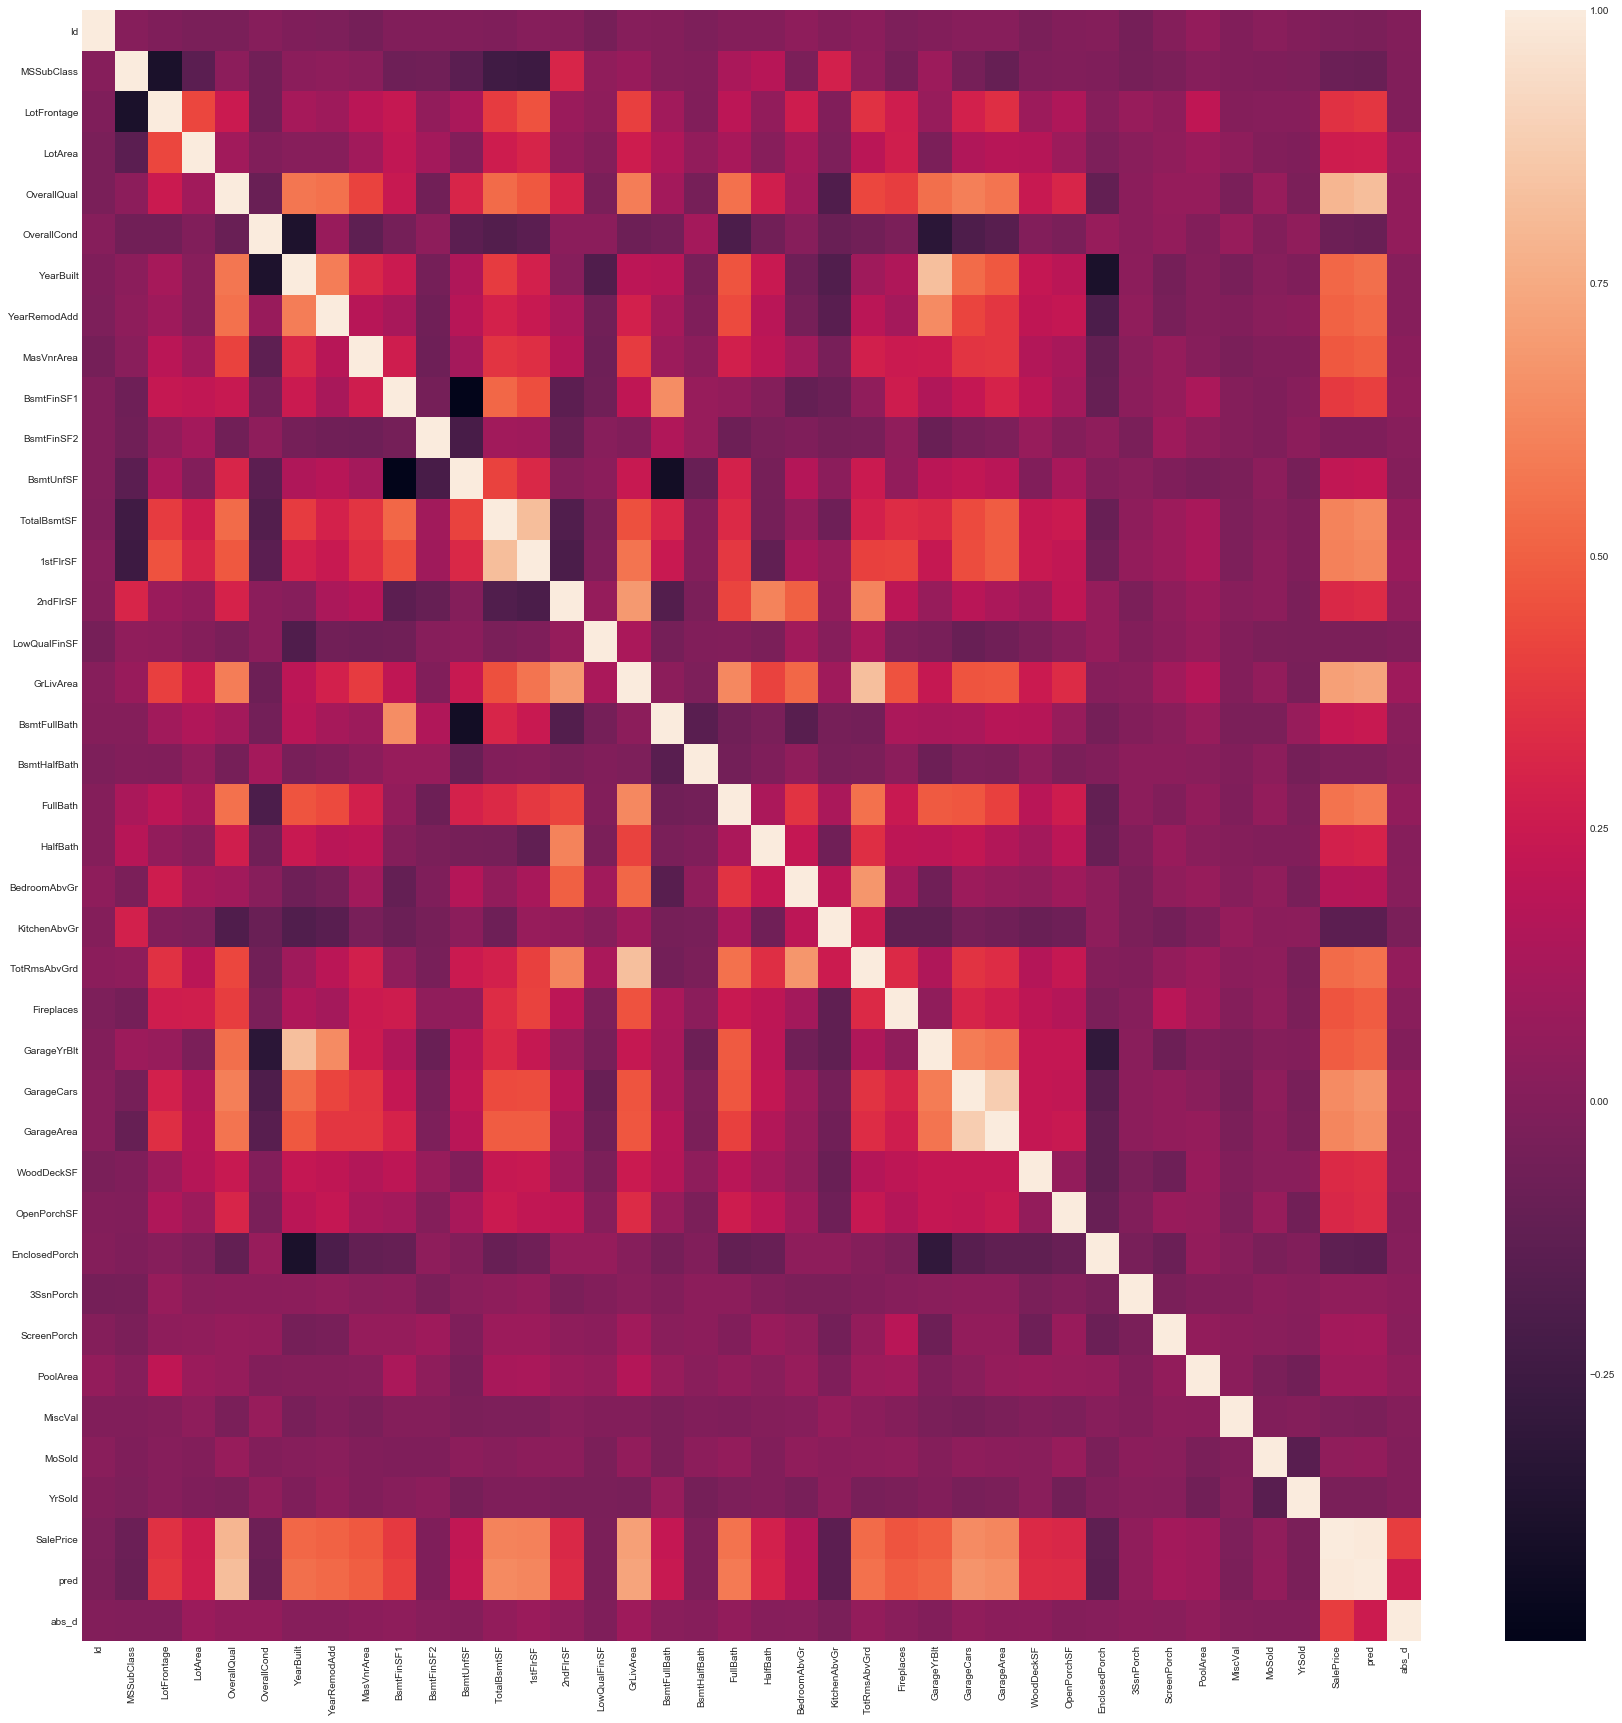

In [149]:
plt.figure(figsize=(30,30))
sns.heatmap(df_verification.corr())

In [152]:
df_verification.corr()["abs_d"].sort_values()

KitchenAbvGr    -0.028099
LowQualFinSF    -0.012592
MSSubClass      -0.009010
LotFrontage     -0.007965
Id              -0.003941
YrSold          -0.003534
MoSold          -0.003342
GarageYrBlt     -0.001005
MiscVal          0.002053
OpenPorchSF      0.005847
BsmtUnfSF        0.006995
BsmtHalfBath     0.008579
YearRemodAdd     0.008778
HalfBath         0.009737
EnclosedPorch    0.011598
YearBuilt        0.011785
BedroomAbvGr     0.014243
BsmtFinSF2       0.018225
ScreenPorch      0.019485
Fireplaces       0.021510
BsmtFullBath     0.024573
3SsnPorch        0.026446
GarageArea       0.029015
MasVnrArea       0.029612
WoodDeckSF       0.035275
BsmtFinSF1       0.038179
2ndFlrSF         0.042497
PoolArea         0.042677
GarageCars       0.043161
OverallCond      0.050704
TotalBsmtSF      0.053440
OverallQual      0.053602
FullBath         0.053639
TotRmsAbvGrd     0.058602
LotArea          0.078211
1stFlrSF         0.079854
GrLivArea        0.092885
pred             0.258081
SalePrice   